<a href="https://colab.research.google.com/github/daveking63/Bollywood/blob/master/Milestone_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
from google.colab import files
data_to_load = files.upload()

Saving bw_success_measures.txt to bw_success_measures (1).txt
Saving india_cpi_2020.txt to india_cpi_2020 (1).txt


In [118]:
import io
df_sm = pd.read_csv(io.BytesIO(data_to_load['bw_success_measures.txt']),sep='\t')

In [119]:
# total sample size, variables, missing values, data types
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film           3002 non-null   object 
 1   id             3002 non-null   int64  
 2   rank           3002 non-null   int64  
 3   release_date   3002 non-null   object 
 4   verdict        3002 non-null   object 
 5   budget         2832 non-null   float64
 6   first_week     2496 non-null   float64
 7   tot_net_gross  3002 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 187.8+ KB


In [120]:
# note format of release date and financial variables/columns
df_sm.head(5)

,film,id,rank,release_date,verdict,budget,first_week,tot_net_gross
0,Hum Aapke Hain Koun..!,11,1,5-Aug-94,All Time Blockbuster,6.250000e+07,6.800000e+06,724650000
1,Bahubali 2 - The Conclusion,3517,2,28-Apr-17,All Time Blockbuster,1.950000e+09,2.464700e+09,5103600000
2,Gadar - Ek Prem Katha,657,3,15-Jun-01,All Time Blockbuster,1.900000e+08,9.280000e+07,768800000
3,Dilwale Dulhania Le Jayenge,3036,4,20-Oct-95,All Time Blockbuster,4.000000e+07,3.372500e+07,533125000
4,Raja Hindustani,2737,5,11-Nov-96,All Time Blockbuster,5.750000e+07,3.650000e+07,431450000


In [121]:
# aggregate stats for all variables/columns
df_sm.describe(include = 'all')

,film,id,rank,release_date,verdict,budget,first_week,tot_net_gross
count,3002,3002.000000,3002.000000,3002,3002,2.832000e+03,2.496000e+03,3.002000e+03
unique,2977,NaN,NaN,1326,9,NaN,NaN,NaN
top,Baaghi,NaN,NaN,16-Nov-01,Disaster,NaN,NaN,NaN
freq,2,NaN,NaN,9,1735,NaN,NaN,NaN
mean,NaN,1925.207528,1507.872418,NaN,NaN,1.348159e+08,9.572944e+07,1.270749e+08
std,NaN,1302.691181,872.595911,NaN,NaN,2.735867e+08,2.226717e+08,3.312716e+08
min,NaN,1.000000,1.000000,NaN,NaN,8.000000e+05,2.500000e+04,5.000000e+04
25%,NaN,770.250000,755.250000,NaN,NaN,1.250000e+07,4.375000e+06,2.350000e+06
50%,NaN,1896.500000,1505.500000,NaN,NaN,4.500000e+07,1.870000e+07,1.677500e+07
75%,NaN,2769.750000,2255.750000,NaN,NaN,1.400000e+08,6.770000e+07,9.006250e+07


In [122]:
# convert budget, first_week, and tot_net_gross from rupees to crores (10 million rupees)
# create new variables for the values in crores - saves the agony of rerunning everything
# if you make a mistake

cr = 10000000

df_sm.loc[0:,'budget_cr'] = round(df_sm.loc[0:,'budget'].div(cr),3)
df_sm.loc[0:,'first_week_cr'] = round(df_sm.loc[0:,'first_week'].div(cr),3)
df_sm.loc[0:,'tot_net_gross_cr'] = round(df_sm.loc[0:,'tot_net_gross'].div(cr),3)
df_sm.loc[0:,'budget_cr':'tot_net_gross_cr'].head()

,budget_cr,first_week_cr,tot_net_gross_cr
0,6.25,0.680,72.465
1,195.00,246.470,510.360
2,19.00,9.280,76.880
3,4.00,3.372,53.312
4,5.75,3.650,43.145


In [123]:
# creating values for missing budget and tot_net_gross using groupby 'verdict'
df_sm.groupby(['verdict']).size()

verdict
All Time Blockbuster      12
Average                  132
Below Average            103
Blockbuster               44
Disaster                1735
Flop                     669
Hit                      132
Semi Hit                 103
Super Hit                 72
dtype: int64

In [124]:
# fill missing budget and first_week missing values with mean of groupby 'verdict'
df_sm['budget_cr'] = df_sm.groupby('verdict')['budget_cr'].transform(lambda grp: grp.fillna(np.mean(grp)))
df_sm['first_week_cr'] = df_sm.groupby('verdict')['first_week_cr'].transform(lambda grp: grp.fillna(np.mean(grp)))
df_sm.loc[0:,'budget_cr':'tot_net_gross_cr'].describe(include='all')

,budget_cr,first_week_cr,tot_net_gross_cr
count,3002.000000,3002.000000,3002.000000
mean,13.077344,8.303543,12.707494
std,26.630818,20.517879,33.127153
min,0.080000,0.002000,0.005000
25%,1.400000,0.630000,0.235000
50%,5.000000,1.554202,1.677500
75%,13.000000,5.385000,9.006250
max,575.000000,246.470000,510.360000


In [125]:
# read consumer price index ratio for years between 1994 & 2019 with base year of 2020
df_cpi = pd.read_csv(io.BytesIO(data_to_load['india_cpi_2020.txt']),sep='\t')

In [126]:
# create a dictionary of CPI ratios with year as key
dict_cpi = dict(zip(df_cpi.Year, df_cpi.CPI_Ratio))
print(dict_cpi)

{1994: 5.77, 1995: 5.27, 1996: 4.8, 1997: 4.35, 1998: 4.09, 1999: 3.55, 2000: 3.53, 2001: 3.41, 2002: 3.25, 2003: 3.15, 2004: 3.03, 2005: 2.92, 2006: 2.77, 2007: 2.6, 2008: 2.46, 2009: 2.25, 2010: 1.95, 2011: 1.78, 2012: 1.68, 2013: 1.51, 2014: 1.38, 2015: 1.3, 2016: 1.23, 2017: 1.2, 2018: 1.15, 2019: 1.1, 2020: 1.0}


In [127]:
# create a release_year column - insert after release_date
import datetime
df_sm['release_date'] = pd.to_datetime(df_sm['release_date'])
df_sm['release_year'] = df_sm['release_date'].map(lambda x: int(x.strftime('%Y')))
# df_sm['release_month'] = df_sm['release_date'].map(lambda x: x.strftime('%m'))
# df_sm['release_day'] = df_sm['release_date'].map(lambda x: x.strftime('%d'))
df_sm.head()


,film,id,rank,release_date,verdict,budget,first_week,tot_net_gross,budget_cr,first_week_cr,tot_net_gross_cr,release_year
0,Hum Aapke Hain Koun..!,11,1,1994-08-05,All Time Blockbuster,6.250000e+07,6.800000e+06,724650000,6.25,0.680,72.465,1994
1,Bahubali 2 - The Conclusion,3517,2,2017-04-28,All Time Blockbuster,1.950000e+09,2.464700e+09,5103600000,195.00,246.470,510.360,2017
2,Gadar - Ek Prem Katha,657,3,2001-06-15,All Time Blockbuster,1.900000e+08,9.280000e+07,768800000,19.00,9.280,76.880,2001
3,Dilwale Dulhania Le Jayenge,3036,4,1995-10-20,All Time Blockbuster,4.000000e+07,3.372500e+07,533125000,4.00,3.372,53.312,1995
4,Raja Hindustani,2737,5,1996-11-11,All Time Blockbuster,5.750000e+07,3.650000e+07,431450000,5.75,3.650,43.145,1996


In [128]:
# note years outside study boundaries - 1994 to 2019
df_sm.groupby(['release_year']).size()

release_year
1993     21
1994    100
1995     94
1996     91
1997     91
1998    109
1999    110
2000    129
2001    145
2002    131
2003    132
2004    151
2005    158
2006    124
2007    122
2008    106
2009    101
2010    111
2011    110
2012    104
2013    125
2014    129
2015    104
2016    113
2017    100
2018     92
2019     81
2020     18
dtype: int64

In [129]:
# delete rows with years less than 1994 or greater than 2019
df_sm = df_sm[(df_sm['release_year'] > 1993) & (df_sm['release_year'] < 2020)]
df_sm = df_sm.reset_index(drop=True)
df_sm.groupby(['release_year']).size()

release_year
1994    100
1995     94
1996     91
1997     91
1998    109
1999    110
2000    129
2001    145
2002    131
2003    132
2004    151
2005    158
2006    124
2007    122
2008    106
2009    101
2010    111
2011    110
2012    104
2013    125
2014    129
2015    104
2016    113
2017    100
2018     92
2019     81
dtype: int64

In [130]:
# create new financial variables adjusted for inflation
df_ln = df_sm.shape[0]
for i in range(df_ln):
  yr = df_sm.loc[i,'release_year']
  cpi_ratio = dict_cpi[yr]
  df_sm.loc[i,'cpi_ratio'] = cpi_ratio
  df_sm.loc[i,'budget_adjust'] = round(df_sm.loc[i,'budget_cr']*cpi_ratio,3)
  df_sm.loc[i,'first_week_adjust'] = round(df_sm.loc[i,'first_week_cr']*cpi_ratio,3)
  df_sm.loc[i,'tot_net_gross_adjust'] = round(df_sm.loc[i,'tot_net_gross_cr']*cpi_ratio,3)

In [131]:
df_sm.head()

,film,id,rank,release_date,verdict,budget,first_week,tot_net_gross,budget_cr,first_week_cr,tot_net_gross_cr,release_year,cpi_ratio,budget_adjust,first_week_adjust,tot_net_gross_adjust
0,Hum Aapke Hain Koun..!,11,1,1994-08-05,All Time Blockbuster,6.250000e+07,6.800000e+06,724650000,6.25,0.680,72.465,1994,5.77,36.062,3.924,418.123
1,Bahubali 2 - The Conclusion,3517,2,2017-04-28,All Time Blockbuster,1.950000e+09,2.464700e+09,5103600000,195.00,246.470,510.360,2017,1.20,234.000,295.764,612.432
2,Gadar - Ek Prem Katha,657,3,2001-06-15,All Time Blockbuster,1.900000e+08,9.280000e+07,768800000,19.00,9.280,76.880,2001,3.41,64.790,31.645,262.161
3,Dilwale Dulhania Le Jayenge,3036,4,1995-10-20,All Time Blockbuster,4.000000e+07,3.372500e+07,533125000,4.00,3.372,53.312,1995,5.27,21.080,17.770,280.954
4,Raja Hindustani,2737,5,1996-11-11,All Time Blockbuster,5.750000e+07,3.650000e+07,431450000,5.75,3.650,43.145,1996,4.80,27.600,17.520,207.096


In [132]:
# roi for first_week_adjust, tot_net_gross_adjust
df_ln = df_sm.shape[0]
for i in range(0,df_ln):
  bud = df_sm.loc[i,'budget_adjust']
  first = df_sm.loc[i,'first_week_adjust']
  tot = df_sm.loc[i, 'tot_net_gross_adjust']
  df_sm.loc[i,'first_week_roi'] = ((first - bud)/bud) * 100
  df_sm.loc[i,'tot_net_gross_roi'] = ((tot - bud)/bud) * 100

#df_sm.info()
df_sm.loc[0:,['first_week_roi','tot_net_gross_roi']].describe()

,first_week_roi,tot_net_gross_roi
count,2963.000000,2963.000000
mean,81.921044,-27.341040
std,513.277258,79.828130
min,-99.628205,-99.967973
25%,-80.662811,-80.047513
50%,-55.981352,-49.103943
75%,-19.837063,-1.194955
max,8306.555773,1232.798861


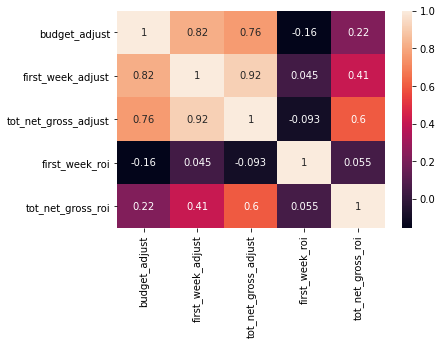

In [133]:
corr_list = ['budget_adjust','first_week_adjust','tot_net_gross_adjust', 'first_week_roi','tot_net_gross_roi']
corr = pd.DataFrame()
for var1 in corr_list:
    for var2 in corr_list:
        corr.loc[var1, var2] = df_sm.corr().loc[var1, var2]
sns.heatmap(corr, annot=True);

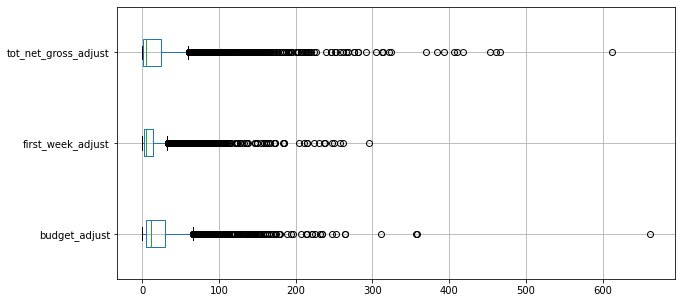

In [134]:
# box_plot of budget_adjust, first_week_adjust, tot_net_gross_adjust
fig, ax = plt.subplots(figsize=(10, 5))
df_sm.loc[0:,['budget_adjust','first_week_adjust','tot_net_gross_adjust']].boxplot(vert=False);

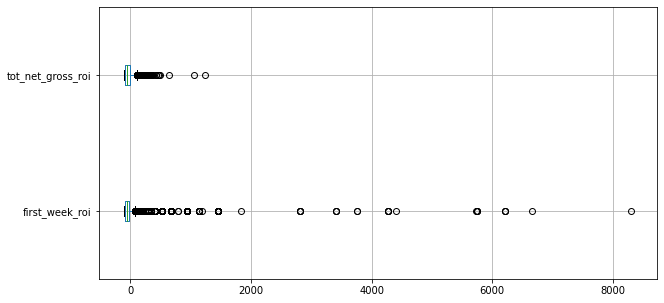

In [135]:
# box_plot of budget_adjust, first_week_adjust, tot_net_gross_adjust
fig, ax = plt.subplots(figsize=(10, 5))
df_sm.loc[0:,['first_week_roi','tot_net_gross_roi']].boxplot(vert=False);

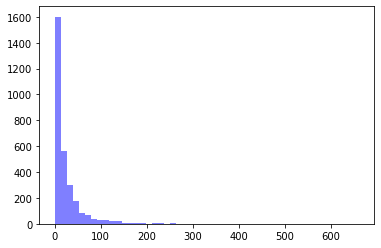

In [136]:
num_bins = 50
col_sel = ['budget_adjust','first_week_adjust','tot_met_gross_adjust']
x = df_sm.budget_adjust
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

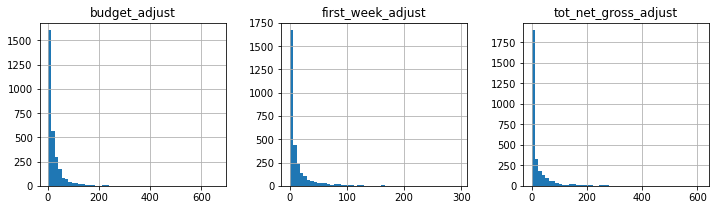

In [137]:
df_sm.loc[0:,['budget_adjust','first_week_adjust','tot_net_gross_adjust']].hist(bins=50,figsize=(12,3), layout=(1,3));

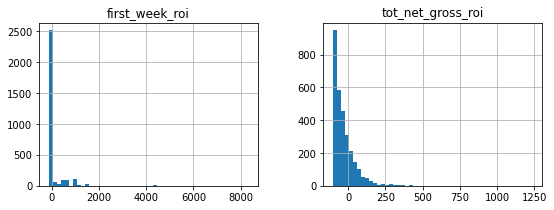

In [138]:
df_sm.loc[0:,['first_week_roi','tot_net_gross_roi']].hist(bins=50,figsize=(9,3), layout=(1,2));

In [139]:
from scipy.stats import kurtosis
from scipy.stats import skew

col_sel = ['budget_adjust','first_week_adjust','tot_net_gross_adjust','first_week_roi','tot_net_gross_roi']
for var in col_sel:
  data = df_sm[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))


budget_adjust 4.784 47.064
first_week_adjust 4.344 25.095
tot_net_gross_adjust 4.375 27.569
first_week_roi 7.743 82.182
tot_net_gross_roi 3.996 38.208


In [140]:
def log_trans(column):
    y = np.log(column + 1)
    return y

In [141]:
df_sm.loc[0:,'budget_log'] = log_trans(df_sm.budget_adjust)
df_sm.loc[0:,'first_week_log'] = log_trans(df_sm.first_week_adjust)
df_sm.loc[0:,'tot_net_gross_log'] = log_trans(df_sm.tot_net_gross_adjust)
df_sm.loc[0:,['budget_log','first_week_log','tot_net_gross_log']].describe()

,budget_log,first_week_log,tot_net_gross_log
count,2963.000000,2963.000000,2963.000000
mean,2.497366,1.928443,1.964387
std,1.232046,1.216286,1.558457
min,0.155293,0.003992,0.005982
25%,1.682688,0.967744,0.444364
50%,2.511630,1.829216,1.685843
75%,3.400697,2.720143,3.227855
max,6.495643,5.692937,6.419069


In [142]:
col_sel = ['budget_log','first_week_log','tot_net_gross_log']
for var in col_sel:
  data = df_sm[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))

budget_log -0.012 -0.669
first_week_log 0.494 -0.377
tot_net_gross_log 0.488 -0.951


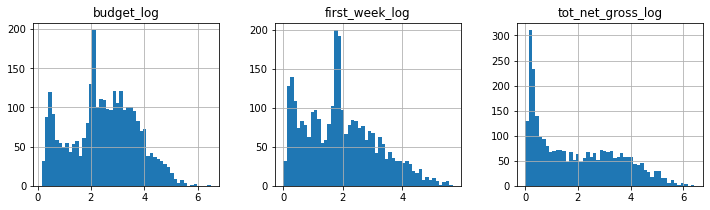

In [143]:
df_sm.loc[0:,['budget_log','first_week_log','tot_net_gross_log']].hist(bins=50,figsize=(12,3), layout=(1,3));

In [144]:
def znorm(df_col):
  df_z = (df_col - df_col.mean())/df_col.std()
  return df_z

def minmax_norm(df_col):
  df_mm = (df_col -df_col.min())/(df_col.max()-df_col.min())
  return df_mm

In [145]:
df_sm.loc[0:,'budget_log_norm'] = minmax_norm(df_sm.budget_log)
df_sm.loc[0:,'first_week_log_norm'] = minmax_norm(df_sm.first_week_log)
df_sm.loc[0:,'tot_net_gross_log_norm'] = minmax_norm(df_sm.tot_net_gross_log)

df_sm.loc[0:,['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']].describe()

,budget_log_norm,first_week_log_norm,tot_net_gross_log_norm
count,2963.000000,2963.000000,2963.000000
mean,0.369392,0.338279,0.305376
std,0.194318,0.213798,0.243012
min,0.000000,0.000000,0.000000
25%,0.240901,0.169408,0.068357
50%,0.371641,0.320837,0.261943
75%,0.511865,0.477444,0.502390
max,1.000000,1.000000,1.000000


In [146]:
col_sel = ['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']
for var in col_sel:
  data = df_sm[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))

budget_log_norm -0.012 -0.669
first_week_log_norm 0.494 -0.377
tot_net_gross_log_norm 0.488 -0.951


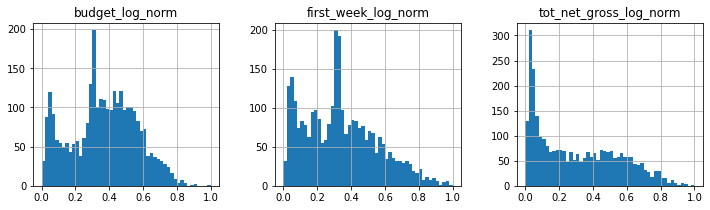

In [147]:
df_sm.loc[0:,['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']].hist(bins=50,figsize=(12,3), layout=(1,3));

In [148]:
# Success where measures are ordinal variables - converted to numerical values

# first measure based on rankings assigned by BOI (partially based on gross revenues and roi)
# verdict_rank - 1-9 based on verdict ('Disaster' = 1 ... 'All Time Blockbuster' = 9)
 
verdict_dict = {'All Time Blockbuster':9,'Blockbuster':8, 'Super Hit':7, 'Hit':6, 'Semi Hit':5, 'Average':4, 'Below Average':3, 'Flop':2, 'Disaster':1}

for i in range(0,df_ln):
  df_sm.loc[i,'verdict_rank'] = verdict_dict[df_sm.loc[i,'verdict']]

# Frequency of verdict_ranks in sorted order
df_sm.verdict_rank.value_counts(sort=False)

9.0      12
8.0      42
7.0      72
6.0     132
5.0     103
4.0     132
3.0     101
2.0     651
1.0    1718
Name: verdict_rank, dtype: int64

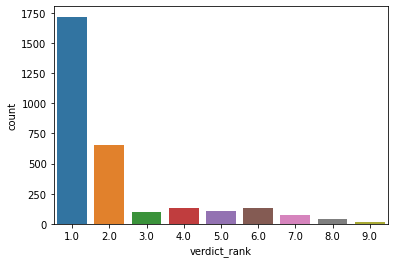

In [149]:
ax = sns.countplot(x="verdict_rank",data=df_sm)

In [150]:
# Success based on profit = 
for i in range(0,df_ln):
  revenue = df_sm.loc[i,'tot_net_gross_adjust']
  budget = df_sm.loc[i,'budget_adjust']
  profit = (.8 * revenue) - budget
  if profit > 0:
    df_sm.loc[i,'success_flop'] = 1 # success
  else:
    df_sm.loc[i,'success_flop'] = 0 # flop

df_sm.success_flop.value_counts()

0.0    2451
1.0     512
Name: success_flop, dtype: int64

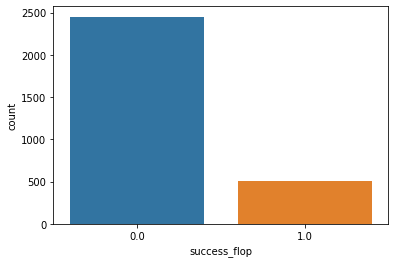

In [151]:
ax = sns.countplot(x="success_flop",data=df_sm);

In [152]:
# Success measured by profit ratio = gross_rev/budget
# 3 ordinal values: low = profit ratio - < 1.0; moderate - profit ratio >= 1.0 and < 2.0; high - >= 2.0

for i in range(0,df_ln):
  revenue = df_sm.loc[i,'tot_net_gross_adjust']
  budget = df_sm.loc[i,'budget_adjust']
  profit_ratio = revenue/budget
  if profit_ratio < 1.0:
    df_sm.loc[i,'profit_ratio'] = 1 # low grossing
  elif profit_ratio >= 2.0:
    df_sm.loc[i,'profit_ratio'] = 3 # high grossing
  else:
    df_sm.loc[i,'profit_ratio'] = 2 # moderate grossing

df_sm.profit_ratio.value_counts()

1.0    2231
2.0     553
3.0     179
Name: profit_ratio, dtype: int64

In [153]:
ax = sns.countplot(x="rev_grossing",data=df_sm);

ValueError: ignored

In [ ]:
var_list = ['success_flop','rev_grossing','verdict_rank','success_flop','rev_grossing']
for i in range(0,2):
  var1= var_list[i]
  for j in range(i+1,3):
    var2 = var_list[j]
    print(pd.crosstab(df_sm.loc[0:,var1],df_sm.loc[0:,var2], dropna = False, margins = True),'\n')


In [ ]:
from scipy import stats

corr = pd.DataFrame()
for var1 in var_list:
    for var2 in corr_list:
        rho, pval = stats.spearmanr(df_sm.loc[0:,var1],df_sm.loc[0:,var2])
        corr.loc[var1, var2] = rho
sns.heatmap(corr, annot=True);


In [ ]:
# success_flop, rev_grossing, verdict_rank by 5 year groups
yr_limits = [(1994,2000,1995),(2000,2005,2000),(2005,2010, 2005),(2010,2015,2010),(2015,2020,2015)]

for i in range(0,df_ln):
  for yr_tup in yr_limits:
    if (df_sm.loc[i,'release_year'] >= yr_tup[0] and df_sm.loc[i,'release_year'] < yr_tup[1]):
      #print(i,df_sm.loc[i,'release_year'],yr_tup[0],yr_tup[2])
      df_sm.loc[i,'5yr'] = yr_tup[2]
      
df_sm.groupby('5yr')['5yr'].count()


In [ ]:
# regardless of the ordinal variable, the percentage of poorly performing movies remained relatively
# the same from 2000 on.
pd.crosstab(df_sm.loc[0:,'5yr'],df_sm.loc[0:,'verdict_rank'], dropna = False, margins = True, normalize='index')

In [ ]:
df_sm.groupby('5yr')['tot_net_gross_adjust','budget_adjust','tot_net_gross_roi'].mean()